# Image quantization

Image quantization is a lossy compression method that replaces a range of similar colors in an image with a single color.

Quantization reduces the size of the image file since fewer bits are required to represent the colors. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
import mahotas as mh

In [2]:
original_img = np.array(mh.imread('bilbo_baggins.jpg'), dtype=np.float64) / 255
original_dimensions = tuple(original_img.shape)
width, height, depth = tuple(original_img.shape)
image_flattened = np.reshape(original_img, (width * height, depth))

In [3]:
image_array_sample = shuffle(image_flattened, random_state=0)[:1000]
estimator = KMeans(n_clusters=64, random_state=0)
estimator.fit(image_array_sample)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=64, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [4]:
# Next, we predict the cluster assignment for each of the pixels in the original image:
cluster_assignments = estimator.predict(image_flattened)

In [5]:
# Finally, we create the compressed image from the compressed palette and cluster assignments:

compressed_palette = estimator.cluster_centers_
compressed_img = np.zeros((width, height, compressed_palette.shape[1]))
label_idx = 0
for i in range(width):
    for j in range(height):
        compressed_img[i][j] = compressed_palette[cluster_assignments[label_idx]]
        label_idx += 1

In [6]:
type(compressed_img)

numpy.ndarray

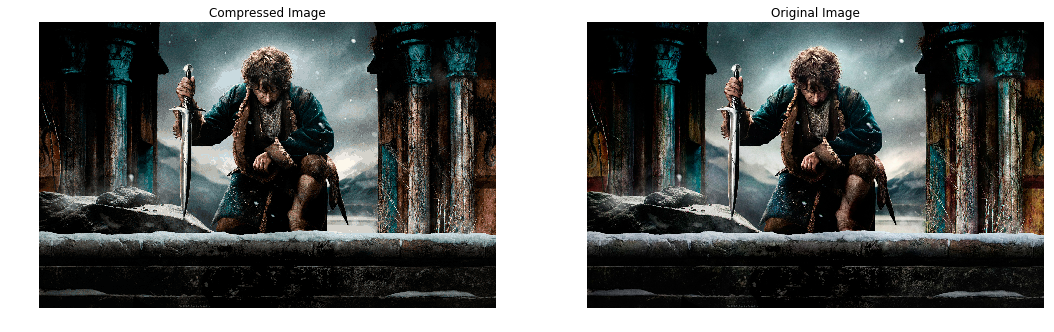

In [7]:
plt.figure(figsize=(18, 26)) 
plt.subplot(122)
plt.title('Original Image')
plt.imshow(original_img)
plt.axis('off')
plt.subplot(121)
plt.title('Compressed Image')
plt.imshow(compressed_img)
plt.axis('off')
plt.show()

### References

1. Mastering Machine Learning with scikit-learn by Gavin Hackeling

In [8]:
type(compressed_img)

numpy.ndarray

In [9]:
type(original_img)

numpy.ndarray

In [10]:
original_img, compressed_img

(array([[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.00392157, 0.00392157, 0.00392157]],
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.00392157, 0.00392157, 0.00392157]],
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        ...,
 
        [[0.01960784, 0.01960784, 0.01960784],
         [0.01960784, 0.01960784, 0.01960

### Saving the compressed image

In [11]:
mh.imsave('compressed_bb.png', (255*compressed_img).astype(np.uint8))